## Avocado Project
### Project Description
- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label 
- The dataset can be seen in two angles to find the region and find the average price .
- Task: One of Classification and other of Regression
- Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip



In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing avacado dataset from Github 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [2]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.shape

(16468, 14)

In [ ]:
# There are 16468 rows and 14 columns or features present 

In [4]:
# Let's check the feature column 
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# Unnamed column is irrelevant so we drop it at this point 
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [8]:
# We have 13 columns out of which Date and Region are object Datatype rest alla re Float variables

In [9]:
# let's check If there are any duplicates present in dataset 
df.duplicated().sum()

14950

In [10]:
# Total of 14950 Duplicate entries are present and we need to delete these enteries 

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape # we are left with this much data only 

(1518, 13)

In [13]:
# lets check if there is any missing value in dataset 
df.isnull().sum()

Date            1
AveragePrice    1
Total Volume    1
4046            1
4225            1
4770            1
Total Bags      1
Small Bags      1
Large Bags      1
XLarge Bags     1
type            1
year            1
region          1
dtype: int64

In [14]:
df.drop(1517,axis=0,inplace=True)

In [15]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [16]:
# No nulls present as we deleted the entire row from DataFrame 

In [17]:
df['Date'] = pd.to_datetime(df.Date) # convert Date datatype 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 165.9+ KB


In [19]:
df.describe().T.round(3)

,count,mean,min,25%,50%,75%,max,std
Date,1517,2015-08-19 07:10:57.350032896,2015-01-04 00:00:00,2015-04-12 00:00:00,2015-07-12 00:00:00,2015-11-15 00:00:00,2016-12-25 00:00:00,NaN
AveragePrice,1517.0,1.07499,0.49,0.98,1.08,1.19,1.68,0.188891
Total Volume,1517.0,1601879.067838,38750.74,147469.99,402791.86,981975.08,44655461.51,4433142.820746
4046,1517.0,646438.654113,467.72,20400.34,81751.17,377578.48,18933038.04,1947613.569742
4225,1517.0,611437.502591,1783.77,41476.06,118664.89,485150.34,18956479.74,1672906.164662
4770,1517.0,50405.495399,0.0,911.25,7688.17,29167.3,1381516.11,137781.249242
Total Bags,1517.0,293597.415735,3311.77,36206.89,73979.06,157609.68,6736304.04,757976.531316
Small Bags,1517.0,248773.595287,3311.77,29727.22,62375.69,146199.35,5893641.72,647476.520502
Large Bags,1517.0,42642.049374,0.0,540.74,5044.35,29267.67,1121076.47,118215.681838
XLarge Bags,1517.0,2181.771074,0.0,0.0,0.0,401.48,108072.79,7455.712144


In [20]:
# we can see there are many columns with minimumvalue zero 
# value of mean is greater than median in almost all columns 


ValueError: could not convert string to float: 'conventional'

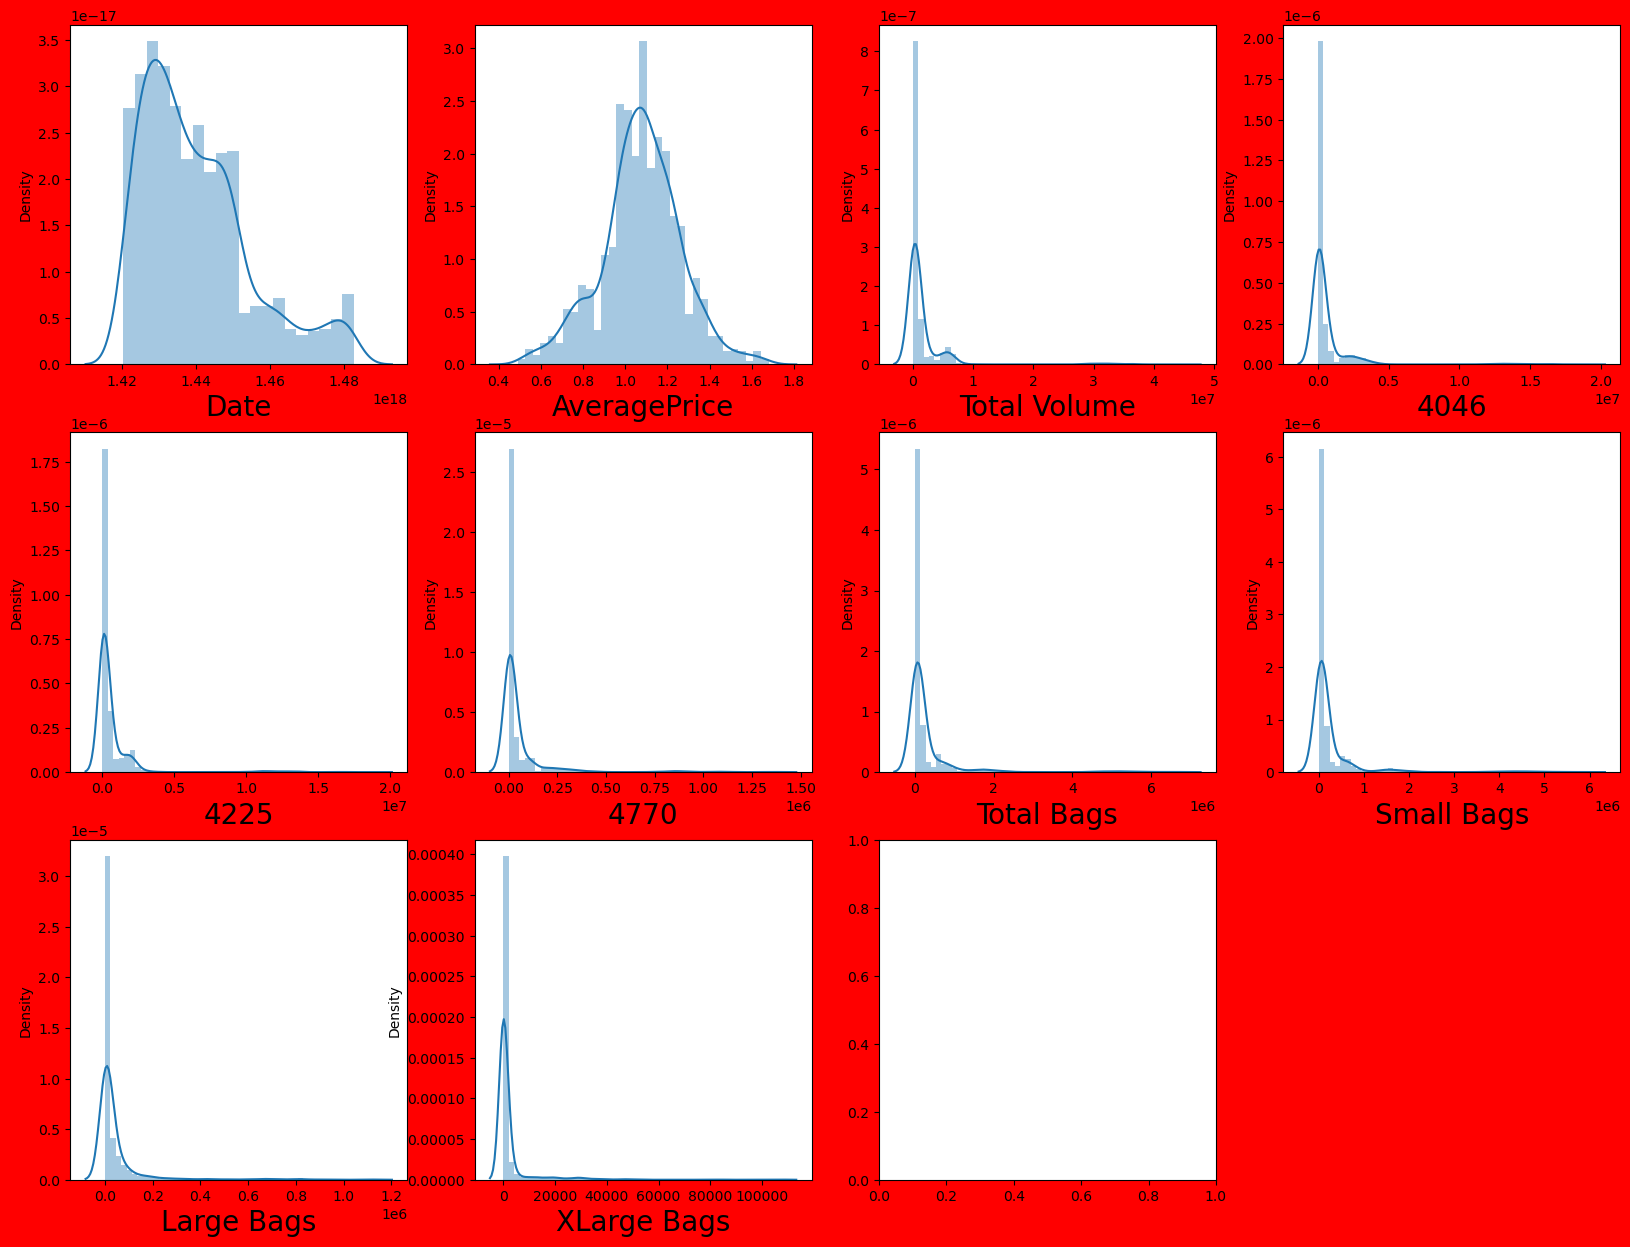

In [21]:
# lets see how data is distributed 
plt.figure(figsize=(20,15),facecolor = 'red')
plotnumber = 1
for column in df:
    if plotnumber <=13:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.tight_layout()

In [ ]:
# data is right skewed for almost all columns
# we can see outliers as data hai sharp peak in almost all features


In [22]:
# extract date , month and year 
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year



In [23]:
df.drop(columns=['Date'], inplace=True)

In [24]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'day', 'month'],
      dtype='object')

In [25]:
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   int32  
 11  region        1517 non-null   object 
 12  day           1517 non-null   int32  
 13  month         1517 non-null   int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 160.0+ KB


In [27]:
# Encoding categorical Data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['region']= le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,16,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,25,9


<function matplotlib.pyplot.show(close=None, block=None)>

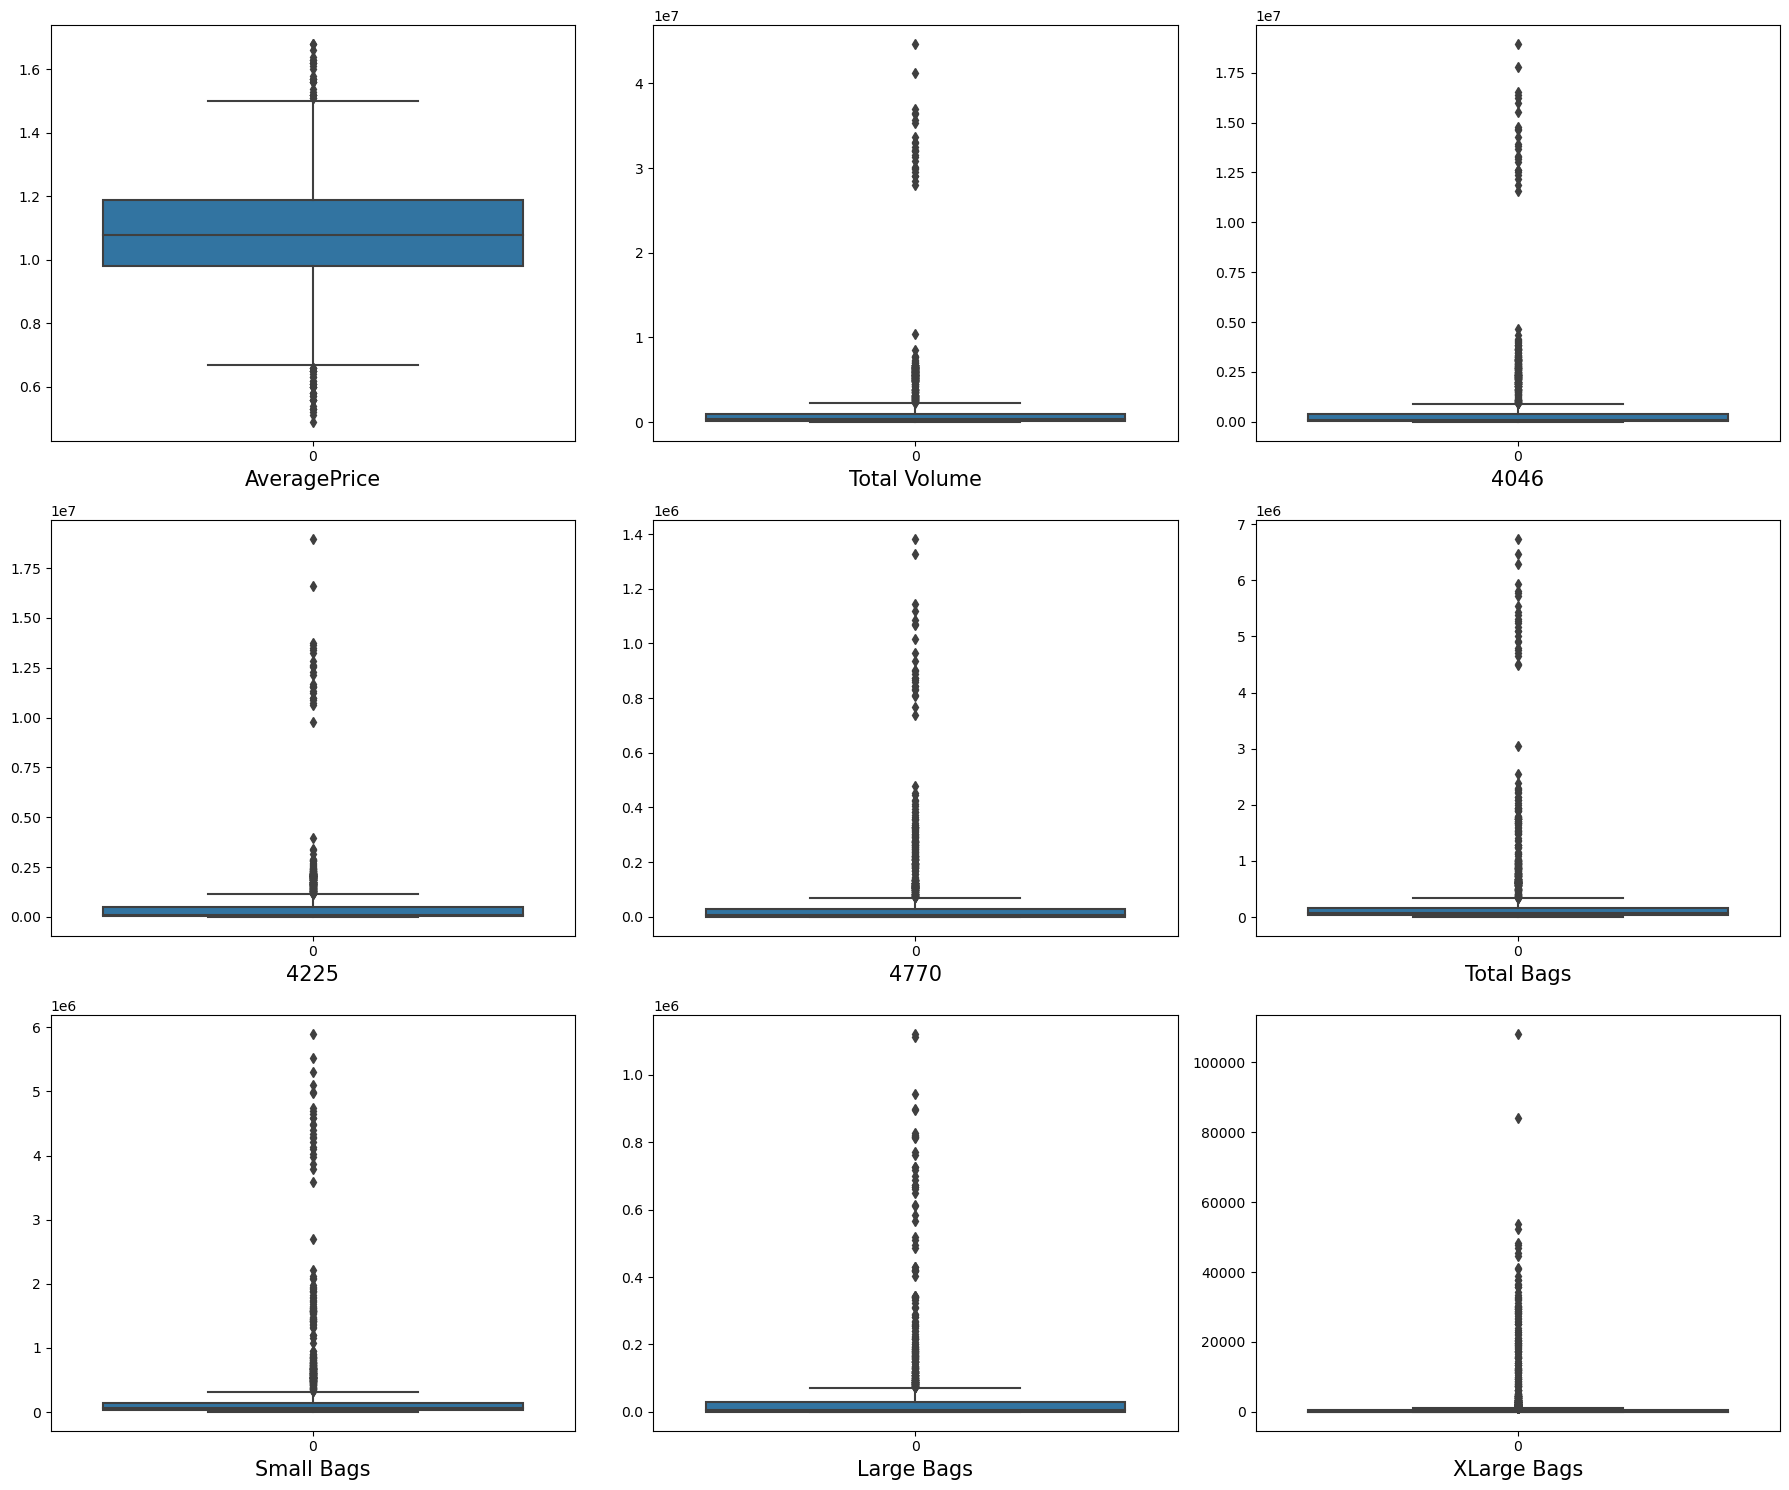

In [28]:
# constructing Boxplot for outlier detection 
plt.figure(figsize=(18,15),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show

In [33]:
# as we have small dataset available we ignore outliers for now 

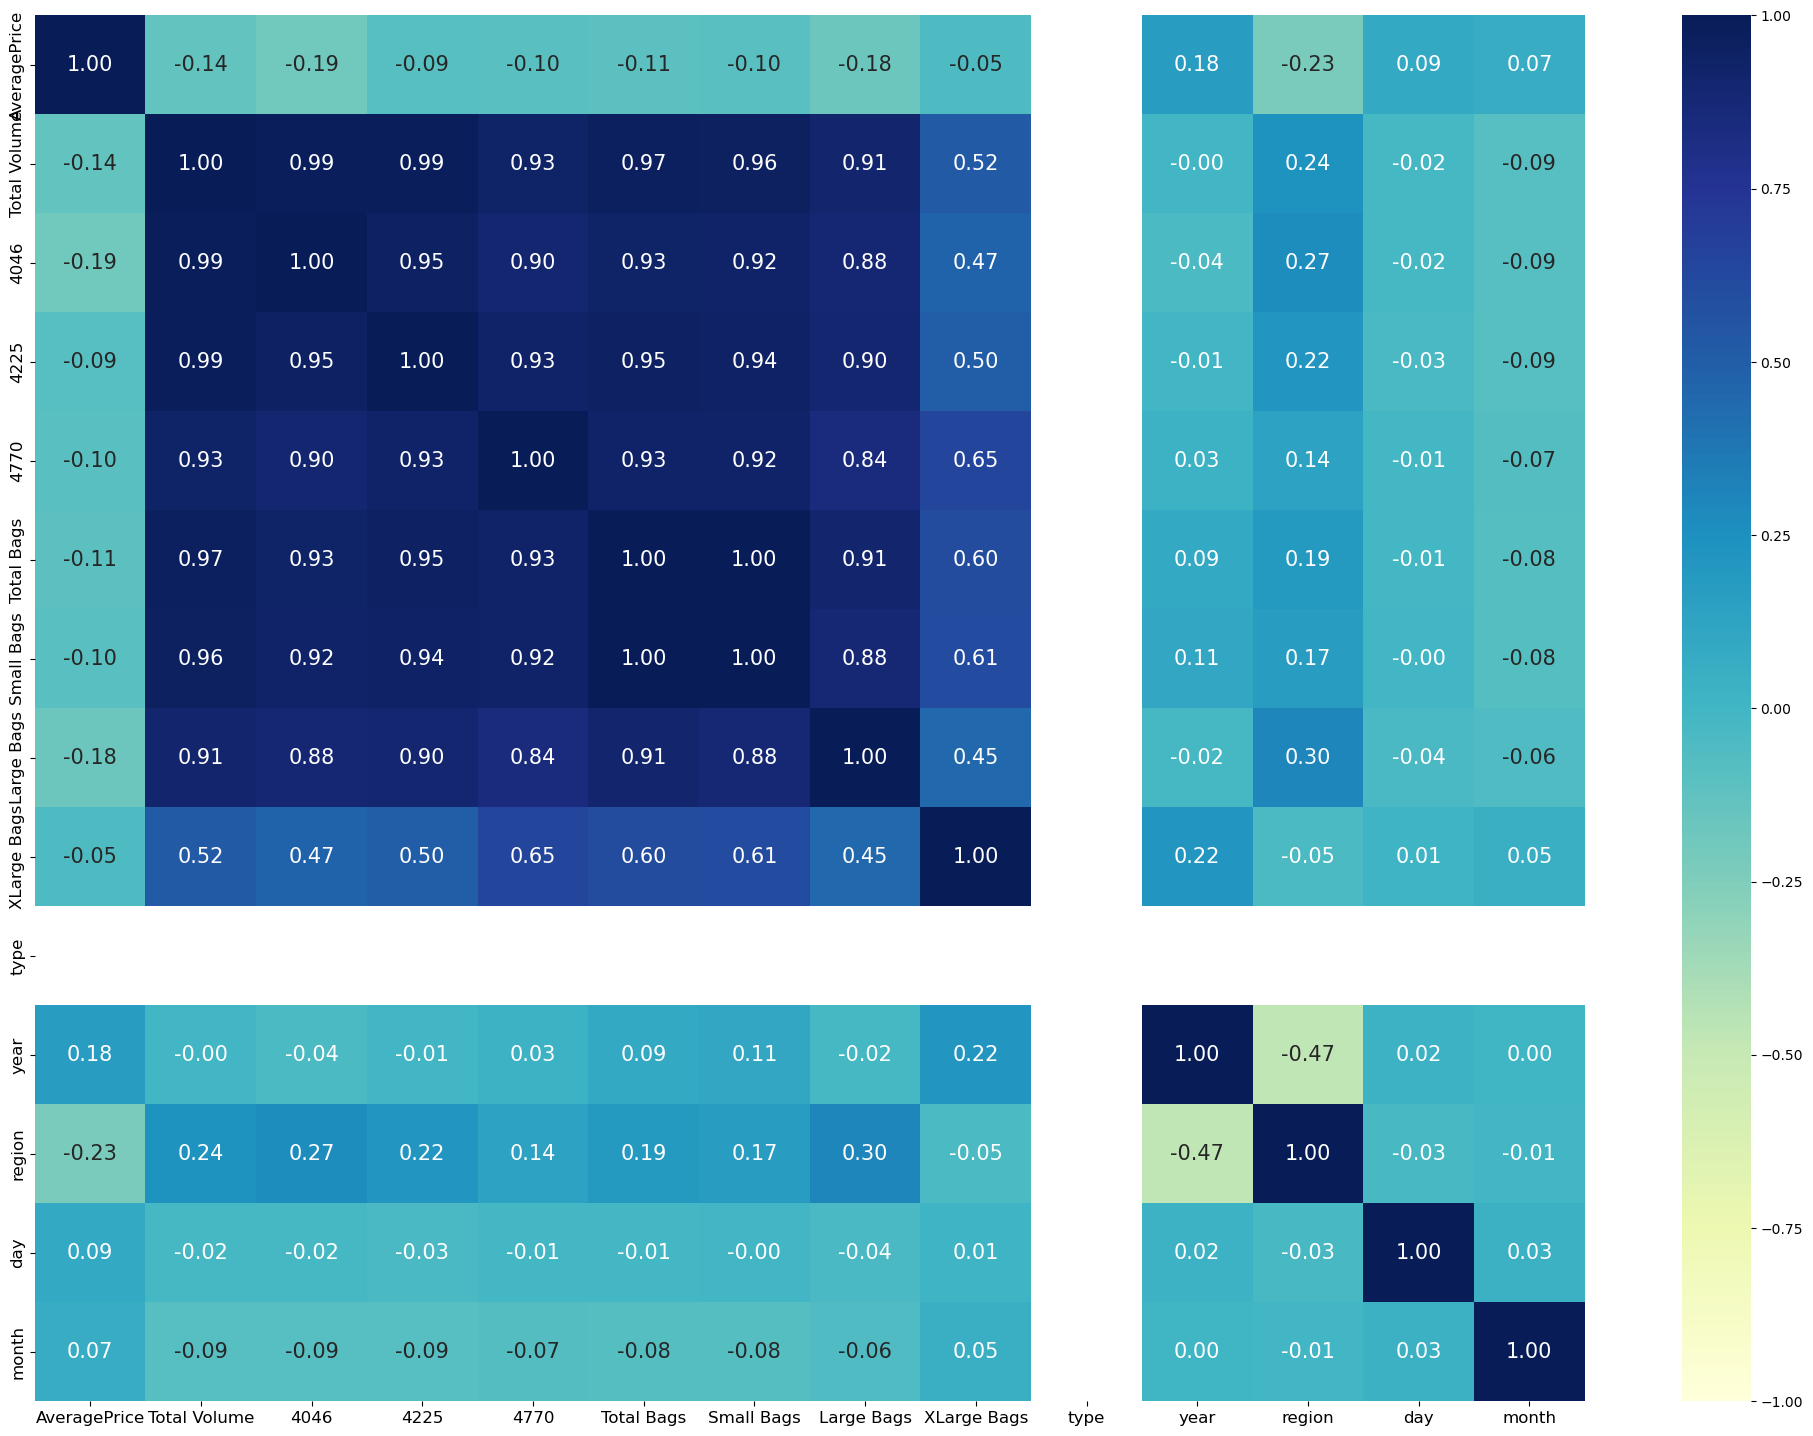

In [40]:
# let's check the correlation and multicollinearity 
df.corr()

plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), vmin=-1, annot=True, fmt='0.2f', 
            annot_kws={'size':15}, cmap="YlGnBu")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# All features are negatively correlated with label as we can see it in above heatmap
# Small bags and Total bags are highly correlated 
# 4046 is highly correlated with Total volume 
# 4225 is highly correlated with Total volume 
# 4770 is also highly correlated with 4046 and 4225
# Thereare multicollinearity between variable 
# we are going to Drop all grade variables 4046,4225,4770,Total Volume & Region 

In [42]:
# checking multicollinearity between variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
vif['features']=df.columns
vif

,VIF,features
0,40.627699,AveragePrice
1,inf,Total Volume
2,inf,4046
3,inf,4225
4,inf,4770
5,inf,Total Bags
6,inf,Small Bags
7,inf,Large Bags
8,inf,XLarge Bags
9,NaN,type


In [43]:
# as we can see features are perfectly correlated with each other and also 
# features are correlated with label as well so we will not removing any feature now 

In [44]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
day             0.027740
month           0.233418
dtype: float64

In [45]:
# Distribution is highly skewed we will transform data through log transformer 
for col in df.columns:
    if df.skew().loc[col]>0.5:
        df[col]=np.log1p(df[col])

In [47]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
day             0.027740
month           0.233418
dtype: float64

In [48]:
# Distribution looks normal now 

In [49]:
X = df.drop('AveragePrice',axis=1)
Y = df['AveragePrice']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# Model Building 

In [54]:
# Importing necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score



In [73]:
# splitting data into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.25)

In [77]:
from sklearn.metrics import accuracy_score

In [83]:
lr = LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [84]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.12094960070232626
Mean squared error : 0.023766171493634806
Root Mean Squared Error: 0.15416280839954494


 R2 Score :
0.3174923568835105


In [86]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)

model = [rf,rd,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.061051664876476903
Mean squared error : 0.006570888346960698
Root Mean Squared Error: 0.08106101619743425


 R2 Score :
0.8112997913834432


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.1209502438583303
Mean squared error : 0.023765406955467135
Root Mean Squared Error: 0.154160328734299


 R2 Score :
0.3175143125924066


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.07802631578947368
Mean squared error : 0.012831842105263155
Root Mean Squared Error: 0.1132777211337832


 R2 Score :
0.6315001633960412


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.1085388173274875
Mean squared error : 0.01797588308824997
Root Mean Squared Error: 0.1340741701009183


 R2 Score :
0.48377560084572646


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.06939462283898609
Mean squared error : 0.009742688373438958
Root Mean Squared Error: 0

In [87]:
# Score of Random forest is best so we tune hyperparamer for Random forest 

Hyper parameter tuning : Grid Search CV 

In [101]:
from sklearn.model_selection import GridSearchCV


In [111]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'max_features':["auto","sqrt","log2"]}

In [112]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [114]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=3)

In [115]:
GCV.best_params_

{'criterion': 'poisson',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 30}

In [117]:
Final_mod =  RandomForestRegressor(n_estimators=30 ,criterion = 'poisson', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.06850175697876762
Mean squared error : 0.007931826612675158
Root Mean Squared Error: 0.08906080289709474


 R2 Score of Final Model :
0.7722168970936083




In [118]:
# we consider going with the untuned model as it gives high accuracy iii-

In [119]:
import joblib
joblib.dump(Final_mod,'Avacado_Finalmodel.pkl')

['Avacado_Finalmodel.pkl']